In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Using TensorFlow backend.


Read the data
===========

In [2]:
x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

# x_original=x_original[['Unnamed: 0','L100700', 'SEX', 'L190400', 'L190500', 'L100500', 'L190300', 'S000100', 'S000300', 
#                        'L103300', 'L103000', 'S000501', 'L101300', 'L101700', 'L100200', 'L103100', 'S000502', 'L190800', 
#                        'L103800', 'FIELD_33', 'AGE', 'FIELD_38', 'FIELD_40', 'FIELD_41', 'FIELD_18', 'FIELD_25', 
#                        'FIELD_42',  'FIELD_29', 'FIELD_21', 'FIELD_19','L100800'
# #                        'FIELD_6','FIELD_7', 
#                       ]]

# y_original=y_original[['Unnamed: 0','L100700', 'SEX', 'L190400', 'L190500', 'L100500', 'L190300', 'S000100', 'S000300', 
#                        'L103300', 'L103000', 'S000501', 'L101300', 'L101700', 'L100200', 'L103100', 'S000502', 'L190800', 
#                        'L103800', 'FIELD_33', 'AGE', 'FIELD_38', 'FIELD_40', 'FIELD_41', 'FIELD_18', 'FIELD_25', 
#                        'FIELD_42', 'FIELD_29', 'FIELD_21', 'FIELD_19','L100800'
# #                        'FIELD_7', 'FIELD_6', 
#                       ]]

x_original=x_original[['Unnamed: 0','L100700', 'SEX', 'L190400', 'L190500', 'L100500', 'L190300', 'S000100', 'S000300', 
                       'L103300', 'L103000', 'S000501', 'L101300', 'L101700', 'L100200']]

y_original=y_original[['Unnamed: 0','L100700']]


print(x_original.shape)
print(y_original.shape)


(159381, 15)
(159381, 2)


In [3]:
for index,col in enumerate(x_original.columns):
    print(col,x_original[col].dropna().shape[0])

Unnamed: 0 159381
L100700 152474
SEX 159381
L190400 159241
L190500 159204
L100500 158954
L190300 159204
S000100 159302
S000300 159075
L103300 135222
L103000 158939
S000501 159305
L101300 159247
L101700 158951
L100200 148627


Prepare the data
============

In [5]:
# df=x_original.copy()
# conditions = [
#     (df.S000501 < 120)  ,
#     (df.S000501 >= 120) & (df.S000501 < 130),
#     (df.S000501 >=130)]
# choices = [0,1,2]
# df['sbpG'] = np.select(conditions, choices, default=0)
# df.head()
# x_original=df.copy()

# conditions2 = [
#     (df.S000502 < 80)  ,
#     (df.S000502 >= 80) & (df.S000502 < 90),
#     (df.S000502 >=90)]
# choices2 = [0,1,2]
# df['dbpG'] = np.select(conditions2, choices2, default=0)
# df.head()
# x_original=df.copy()

# conditions3 = [
#     (df.AGE < 30)  ,
#     (df.AGE >= 30) & (df.AGE < 40),
#     (df.AGE >= 40) & (df.AGE < 50),
#     (df.AGE >= 50) & (df.AGE < 60),
#     (df.AGE >= 60)]
# choices3 = [0,1,2,3,4]
# df['AgeG'] = np.select(conditions3, choices3, default=0)
# df.head()
# x_original=df.copy()


# conditions4 = [
#     (df.L100800 < 100)  ,
#     (df.L100800 >= 100) & (df.L100800 < 126), 
#     (df.L100800 >= 126)]
# choices4 = [0,1,2]
# df['CLASS'] = np.select(conditions4, choices4, default=0)
# df.head()
# x_original=df.copy()

In [6]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data=data.dropna(). reset_index()

# data=data[data.AGE_x >= 40]
# data=data[data.AGE_x < 50]

# data=data[data.CLASS_x==0]
# data=data[data.sbpG==0]
# data=data[data.dbpG==0]

# data=data[data.L100800_y <200]

print(data.shape)

(127171, 18)


In [7]:
print(data.shape)
print(data.columns)
data.head()

(127171, 18)
Index(['index', 'Unnamed: 0', 'L100700_x', 'SEX', 'L190400', 'L190500',
       'L100500', 'L190300', 'S000100', 'S000300', 'L103300', 'L103000',
       'S000501', 'L101300', 'L101700', 'L100200', 'sbpG', 'L100700_y'],
      dtype='object')


,index,Unnamed: 0,L100700_x,SEX,L190400,L190500,L100500,L190300,S000100,S000300,L103300,L103000,S000501,L101300,L101700,L100200,sbpG,L100700_y
0,0,0,3.0,1.0,12.3,38.2,0.8,4.20,159.8,20.1,3.1,53.0,121.0,8.0,13.0,4.5,1,3.0
1,1,1,3.0,1.0,13.1,39.0,0.8,4.24,159.5,19.7,3.3,53.0,117.0,9.0,14.0,4.9,0,3.8
2,2,2,3.8,1.0,12.9,38.4,0.8,4.26,159.0,20.2,3.4,41.0,135.0,10.0,15.0,4.9,2,3.1
3,3,3,3.7,1.0,13.5,40.3,0.8,4.20,155.3,24.8,2.8,58.0,118.0,12.0,10.0,4.1,0,3.4
4,4,4,3.4,1.0,12.6,38.6,0.8,3.92,156.0,25.5,2.9,50.0,111.0,12.0,12.0,3.9,0,4.4


In [8]:
# x=data[['L100700_x', 'SEX_x', 'L190400_x', 'L190500_x', 'L100500_x', 'L190300_x', 'S000100_x', 'S000300_x', 
#                        'L103300_x', 'L103000_x', 'S000501_x', 'L101300_x', 'L101700_x', 'L100200_x', 'L103100_x', 'S000502_x', 'L190800_x', 
#                        'L103800_x', 'FIELD_33_x', 'AGE_x', 'FIELD_38_x', 'FIELD_40_x', 'FIELD_41_x', 'FIELD_18_x', 'FIELD_25_x', 
#                        'FIELD_42_x', 'FIELD_29_x', 'FIELD_21_x', 'FIELD_19_x','L100800_x',
#         'CLASS','sbpG','dbpG','AgeG']]

# y=data[['L100700_y', 'SEX_y', 'L190400_y', 'L190500_y', 'L100500_y', 'L190300_y', 'S000100_y', 'S000300_y', 
#                        'L103300_y', 'L103000_y', 'S000501_y', 'L101300_y', 'L101700_y', 'L100200_y', 'L103100_y', 'S000502_y', 'L190800_y', 
#                        'L103800_y', 'FIELD_33_y', 'AGE_y', 'FIELD_38_y', 'FIELD_40_y', 'FIELD_41_y', 'FIELD_18_y', 'FIELD_25_y', 
#                        'FIELD_42_y', 'FIELD_29_y', 'FIELD_21_y', 'FIELD_19_y','L100800_y'
#         ]]

x=data[['L100700_x', 'SEX', 'L190400', 'L190500', 'L100500', 'L190300', 'S000100', 'S000300', 
                       'L103300', 'L103000', 'S000501', 'L101300', 'L101700', 'L100200']]

y=data[['L100700_y' ]]

Check the correlation of the selected feature with the independent variables
=====

In [9]:
temppd=pd.DataFrame(x.copy())
temppd['y']=y.L100700_y
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)

In [10]:
corval.y

y            1.000000
L100700_x    0.855055
SEX          0.628993
L190400      0.521162
L100500      0.506202
L190500      0.501591
L190300      0.490988
S000100      0.475301
S000300      0.429111
L103300      0.401488
L103000      0.364831
S000501      0.343854
L101300      0.305643
L101700      0.305201
L100200      0.206992
Name: y, dtype: float64

In [11]:
#histogram plot of the features
# import matplotlib.pyplot as plt
# x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11])

Apply PCA
===========

In [12]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)   
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x) 
# print(x.shape)


feature scaling
=======

In [13]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [14]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


In [15]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_ 

In [16]:
# x.columns

Random Forest Regressor
=============

In [17]:
ylable=y[['L100700_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [18]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=500)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[9.62106064e-01 2.37054292e-02 3.68811980e-04 2.96492663e-04
 5.93927514e-04 3.99164020e-04 4.61520099e-04 1.51697614e-03
 3.62509740e-04 7.81651342e-03 3.86255316e-04 3.92565198e-04
 2.55640389e-04 1.33812993e-03]


mean_squared_error 0.5046393680305052
root mean_squared_error 0.710379735092792
mean_absolute_error 0.53412152696299
r2_score 0.749836048788649


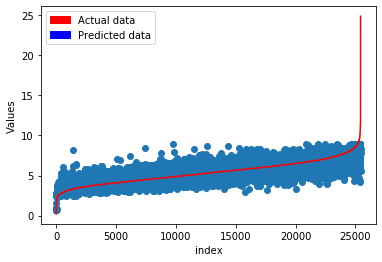

,t + 1,pred (t +1)
9961,11.2,8.895168
8056,11.2,8.791327
1400,11.3,8.940220
14973,11.4,8.364797
11765,11.4,6.503965
11397,11.4,4.301946
10156,11.5,8.576129
23407,11.7,7.757795
13831,15.2,8.273157
1531,24.9,5.576888


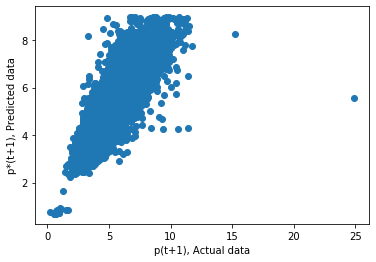

In [19]:

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [20]:
# tempdata=pd.DataFrame(xtest.copy())
# tempdata['ytest']=ytest
# # temp=temp.dropna()
# # tempdata.head()
# # tempdata[tempdata.ytest.isna()].index

# tempdata=tempdata.drop(tempdata[tempdata.ytest.isna()].index)


xg boost
==========

In [21]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

In [22]:
xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain) 

[04:08:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [23]:

ypred = xg_reg.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

# ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
# ypredPD['t + 1']=ytest.values
# ypredPD['pred (t +1)']=ypred
# ypredPD.head(10)

mean_squared_error 0.4981714064187247
root mean_squared_error 0.7058125859027485
mean_absolute_error 0.5307154075040643
r2_score 0.7530423995721822


In [24]:
# ytest[ytest.isna()].shape
# tempdata.iloc[:,-1]

ANN
==========

In [40]:
model= Sequential()
model.add(Dense(input_dim=34,units=128,activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform')) 
# model.add(BatchNormalization())
# model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, kernel_initializer='uniform'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error' ])

W1004 00:26:52.982615 10444 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1004 00:26:52.995581 10444 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1004 00:26:52.997575 10444 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1004 00:26:53.093015 10444 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1004 00:26:53.117435 10444 deprecation.py:506

In [41]:
h=model.fit(xtrain, ytrain, validation_split=.2,epochs=100, batch_size=50)

W1004 00:26:53.623558 10444 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 32352 samples, validate on 8089 samples
Epoch 1/100
32352/32352 [==============================] - 1s 41us/step - loss: 4.6046 - mean_squared_error: 4.6046 - val_loss: 1.6467 - val_mean_squared_error: 1.6467
Epoch 2/100
32352/32352 [==============================] - 1s 24us/step - loss: 1.1394 - mean_squared_error: 1.1394 - val_loss: 2.4030 - val_mean_squared_error: 2.4030
Epoch 3/100
32352/32352 [==============================] - 1s 24us/step - loss: 0.7273 - mean_squared_error: 0.7273 - val_loss: 1.8084 - val_mean_squared_error: 1.8084
Epoch 4/100
32352/32352 [==============================] - 1s 24us/step - loss: 0.6440 - mean_squared_error: 0.6440 - val_loss: 0.9060 - val_mean_squared_error: 0.9060
Epoch 5/100
32352/32352 [==============================] - 1s 23us/step - loss: 0.6222 - mean_squared_error: 0.6222 - val_loss: 1.2086 - val_mean_squared_error: 1.2086
Epoch 6/100
32352/32352 [==============================] - 1s 24us/step - loss: 0.6125 - mean_squared_error: 0.

32352/32352 [==============================] - 1s 27us/step - loss: 0.5566 - mean_squared_error: 0.5566 - val_loss: 0.7155 - val_mean_squared_error: 0.7155
Epoch 98/100
32352/32352 [==============================] - 1s 27us/step - loss: 0.5533 - mean_squared_error: 0.5533 - val_loss: 0.5762 - val_mean_squared_error: 0.5762
Epoch 99/100
32352/32352 [==============================] - 1s 27us/step - loss: 0.5548 - mean_squared_error: 0.5548 - val_loss: 0.6480 - val_mean_squared_error: 0.6480
Epoch 100/100
32352/32352 [==============================] - 1s 25us/step - loss: 0.5599 - mean_squared_error: 0.5599 - val_loss: 0.7154 - val_mean_squared_error: 0.7154


In [42]:
ypred=model.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

mean_squared_error 0.7174055272813694
root mean_squared_error 0.8469979499865211
mean_absolute_error 0.6392646479377901
r2_score 0.636315591648466


,t + 1,pred (t +1)
0,5.3,4.723892
1,4.3,5.306175
2,4.2,4.000012
3,6.1,5.396946
4,4.4,5.289919
5,7.1,6.372007
6,5.5,5.720734
7,7.3,5.965288
8,4.2,4.421140
9,6.3,5.605452


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


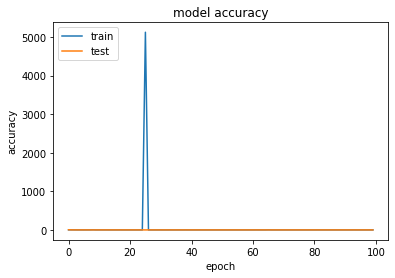

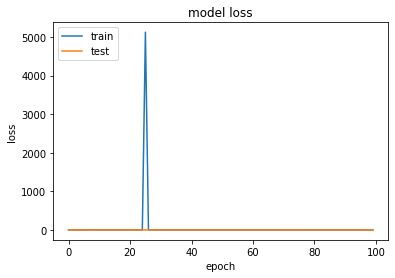

In [43]:
history=h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

0.6392646479377897
0.555649383315002
99.99010978142617


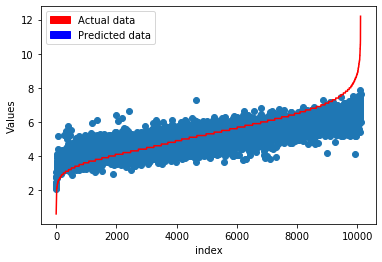

,t + 1,pred (t +1),diff
9432,0.6,2.046516,1.446516
4784,0.7,2.396551,1.696551
91,0.7,2.124404,1.424404
8845,0.8,2.218421,1.418421
2100,0.9,2.339827,1.439827
2068,1.0,2.470100,1.470100
7307,1.3,2.347502,1.047502
4109,1.4,2.792722,1.392722
3492,1.5,2.782716,1.282716
2684,1.5,2.363954,0.863954


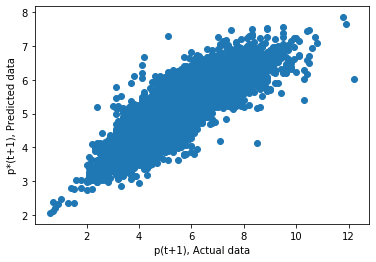

In [45]:

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)